In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
iris = load_iris()

In [7]:
df= pd.DataFrame(iris.data, columns=iris.feature_names)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
x = iris.data


In [10]:
y = iris.target

In [11]:
class_names = iris.target_names

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [13]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [15]:
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)


Model: Decision Tree
Accuracy: 96.67%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      0.95      0.95        19
           2       0.94      0.94      0.94        18

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



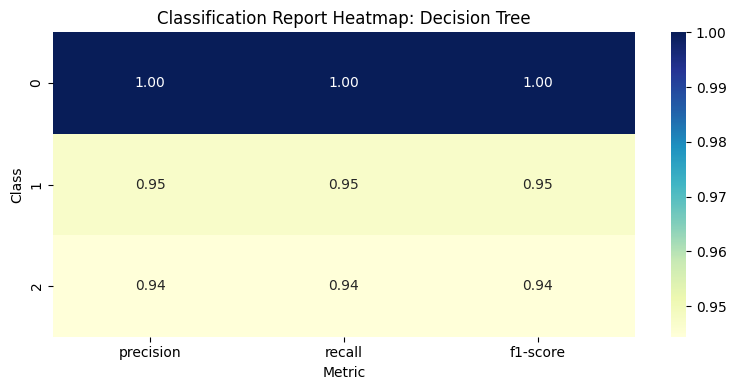


Model: SVC
Accuracy: 98.33%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



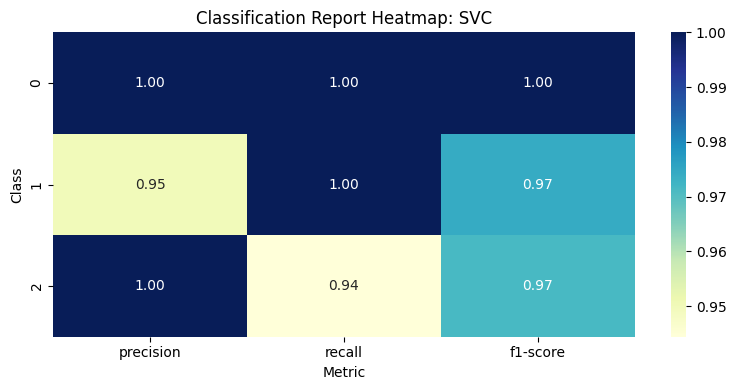


Model: Random Forest
Accuracy: 98.33%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



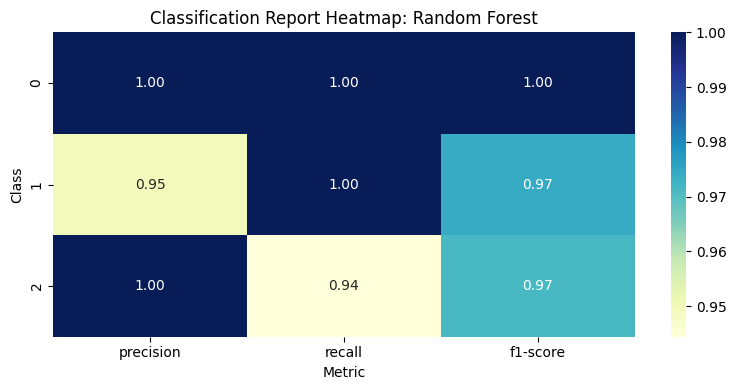

In [23]:
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    print(f'\nModel: {name}')
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    report_df = pd.DataFrame(report).transpose()

    class_metrics = report_df.iloc[:-3][['precision', 'recall', 'f1-score']]

    plt.figure(figsize=(8, 4))
    sns.heatmap(class_metrics, annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title(f'Classification Report Heatmap: {name}')
    plt.ylabel('Class')
    plt.xlabel('Metric')
    plt.tight_layout()
    plt.show()

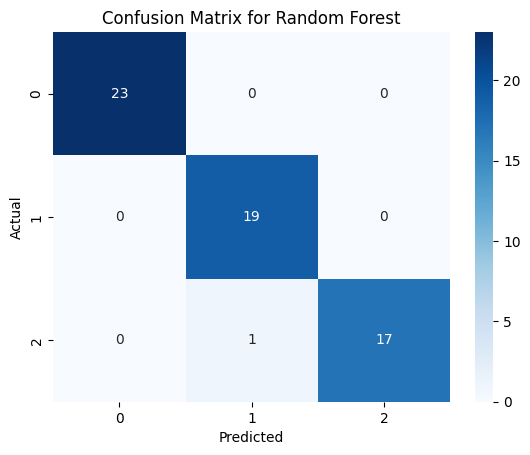

In [17]:


    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()